/Users/chsu/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


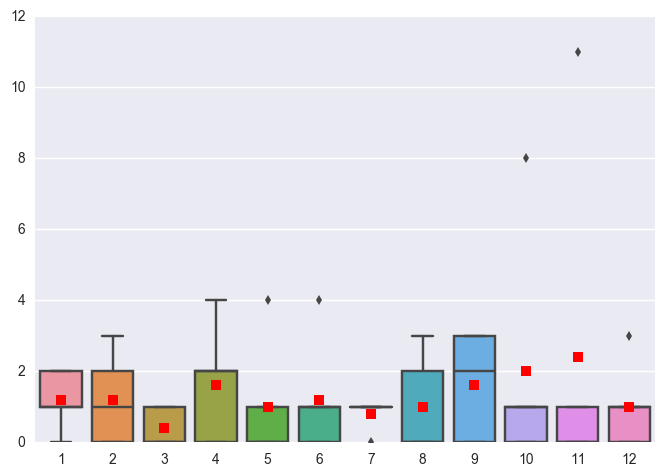

In [1]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("darkgrid")
import pyes
from datetime import datetime
from calendar import monthrange

conn = pyes.es.ES(server=[('http', 'localhost', 9200)])

Month_Twitter = dict()

def queryResult(Sfrom, Sto, Y, M):
    q = pyes.query.BoolQuery()
    ESR = pyes.ESRange(field="created_at", from_value=Sfrom, to_value=Sto, include_lower=True ,include_upper=True)
    q.add_must(pyes.query.TermQuery(field="text", value="cve"))
    q.add_must(pyes.query.RangeQuery(qrange=ESR))
    result = None
    result = conn.search(query=q , indices='twitter2' , doc_types='tweet')
    storage = set() 
    for x in result:
            storage.add(x['uid'])
    if M in Month_Twitter:
        Month_Twitter[M].append(len(storage))
    else:
        Month_Twitter[M] = [len(storage)]
    return
def DataConvert(s):
    date_object = datetime.strptime(s, '%Y %m %d %X') 
    dt_str = date_object.ctime() 
    dt_list = dt_str.split() 
    dt_list.insert(4, '+0000') 
    dt_result = ' '.join(dt_list) 
    return dt_result 

###main
for y in range(2009, 2014):
    for m in range(1, 13):
        dt_from = [y, m, '1', '00:00:00']
        dt_to = [y, m, monthrange(y, m)[1], '23:59:59']
        Sdt_from = DataConvert(' '.join(str(v) for v in dt_from))
        Sdt_to = DataConvert(' '.join(str(v) for v in dt_to))
        queryResult(Sdt_from, Sdt_to, y, m)

picRes = pd.DataFrame(dict([(k,Series(v)) for k,v in Month_Twitter.iteritems()])) 
ax = sb.boxplot(picRes, vert=True, showmeans=True) # draw the graph